In [38]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
import keras.backend as K


In [39]:
from keras.datasets import cifar10

In [40]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [41]:
X_train.shape

(50000, 32, 32, 3)

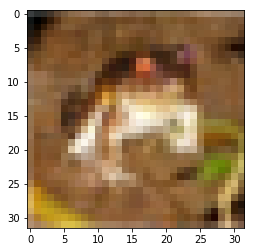

In [42]:
plt.imshow(X_train[0])

In [43]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [44]:
y_train_cat.shape

(50000, 10)

In [45]:
y_test.shape

(10000, 1)

In [46]:
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Flatten, Activation
from keras.layers import Conv2D

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [47]:
K.clear_session()
model = Sequential()
model.add(Conv2D(32,(3, 3),activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32,(3, 3),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [49]:
h = model.fit(X_train, y_train_cat, batch_size=128,
          epochs=20, verbose=1, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/20
35000/35000 [==============================] - 212s - loss: 1.9127 - acc: 0.3111 - val_loss: 1.6336 - val_acc: 0.4037
Epoch 2/20
35000/35000 [==============================] - 212s - loss: 1.4958 - acc: 0.4677 - val_loss: 1.4429 - val_acc: 0.4931
Epoch 3/20
35000/35000 [==============================] - 212s - loss: 1.2834 - acc: 0.5471 - val_loss: 1.0938 - val_acc: 0.6153
Epoch 4/20
35000/35000 [==============================] - 212s - loss: 1.1381 - acc: 0.6007 - val_loss: 1.1093 - val_acc: 0.6039
Epoch 5/20
35000/35000 [==============================] - 212s - loss: 1.0464 - acc: 0.6339 - val_loss: 1.0157 - val_acc: 0.6432
Epoch 6/20
35000/35000 [==============================] - 211s - loss: 0.9469 - acc: 0.6704 - val_loss: 0.9496 - val_acc: 0.6741
Epoch 7/20
35000/35000 [==============================] - 212s - loss: 0.8855 - acc: 0.6902 - val_loss: 0.8596 - val_acc: 0.7045
Epoch 8/20
35000/35000 [=======================

In [50]:
test_acc = model.evaluate(X_test, y_test_cat)

 9984/10000 [============================>.] - ETA: 0s

In [51]:
test_acc

[0.82400847959518431, 0.75629999999999997]

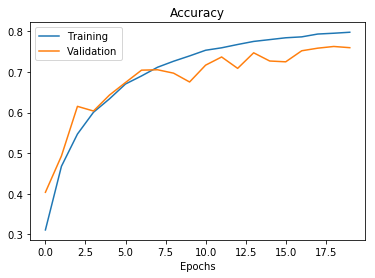

In [52]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')